# Hodan Mohamed Abdi SBA23416_Data Preperation_CA1

# Characterisation of the data set- aps_failure_set (1).csv

<font color="blue"> Introduction: 

My assignment i have been asked by Haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes.

*The dataset’s <font color="green"> positive class consists of component failures for a specific component of the APS system. text</font> 

*The <font color="red"> negative class consists of trucks with failures for components not related to the APS

*The data consists of a subset of all available data, selected by experts.

*The main aim of this analysis will help determine the investment strategy for the company in the upcoming year.

All data wrangling, analysis, and visualizations must be generated using python.

The companies CTO also requires that i must include rationalize all the decisions that you have made in the report.

Assignment Minimum Requirements: 

Step 1 of the assignment is to: use the dataset contained within the file “aps_failure_set.csv”, conduct the following analysis and report with my findings as following step below:

1.Characterisation of the data set: Which incldues the size; How many number of attributes; if there are or has/does not have missing values, Also listing the number of observations. and idenfying what these Characterisation mean.

I will be importing the dataset with Panda library to verify what are the specific's

Step 2:Application of Data preparation & Evaluation Methods: Include the following:Cleaning, renaming, & Exploratory Data Analysis (EDA) to get a better understanding of the data-set by summarizing its main characteristics and often plotting them visually.

I have come to understand that this step is very important especially when we arrive at modelling the data to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plots.

Step 3: Use Principal Component Analysis, In this section, i will be explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering,

Step 4:Final Part: Curse of Dimensionality, I will end the assignment with my finding toward my analysis.

# 1. Characterisation of the data set

In [40]:
import pandas as pd
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set() 

In [41]:
aps_failure_df =pd.read_csv ("aps_failure_set (2).csv")

<font color="green"> Size of the dataset text</font> : In this section i have identified the size of the dataset using the follow code below: Dataset size: (6000 , 171)

In [42]:
size = aps_failure_df.shape
print("Dataset Size:", size)

Dataset Size: (60000, 171)


<font color="green"> Data Information text</font>: In this section, I have highlighted the current datafrane which includes the following, range index, columns, dtypes and memory.

In [43]:
aps_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


To get a better understanding of the dataset, I would need to identify rhe Row's and Columns and displaying the dtype value counts. as you can cledarly see within the below that the has 6000 Rows and 171 Colums.

In [44]:
print("The data set has {} rows and {} columns".format(aps_failure_df.shape[0], aps_failure_df.shape[1]))
display(aps_failure_df.describe())
display(aps_failure_df.head())
print(aps_failure_df.dtypes.value_counts())

The data set has 60000 rows and 171 columns


,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


object    170
int64       1
dtype: int64


I have Identified the following: Object = 171, Int64 = 1 & dtype = int64

# Identfying Atributes

In summary, identifying attributes and observations is a critical step in data analysis and modeling. It forms the basis for understanding the dataset's structure, selecting relevant features, and ensuring data quality. This information enables informed decisions, helps with feature engineering, and ultimately leads to more accurate and effective data analysis and modeling. 

In [6]:
num_attributes = len(aps_failure_df.columns)
print("Number of Attributes:", num_attributes)

Number of Attributes: 171


In [7]:
num_observations = aps_failure_df.shape[0]
print("Number of Observations:", num_observations)

Number of Observations: 60000


# Identfying Dublicate dataset

In [8]:
aps_failure_df.duplicated().sum()

0

Zero Dublication were found in this dataset.

# Identyfing Missing data: 

In [9]:
aps_failure_df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

•The class column contains the labels and its appears that the labels are being represented with the value of Zero’s

•Lengh equals to 171

•Data Types equales to int64

# Idenfying what these Characterisation mean.

The dataset i'm currently analysing consist of 600 rows (Observatios) & 171 Colums (Attributes), This makes it a modertely large dataset. Among these attributes, there are 171 distinc ones.

In my analysis, I'm taking steps to identify the duplicated data entries, which helps maintain the datasets intergrity. Addtionally, I will be addrressing the missing values  (Na, NAN) to ensure that any fields with non-numeric or null vales are appropriatley transformed into numerica data.

# 2. Exploratory Data Analysis

Exploratory data analysis I have found to be a curitical step in the data analysis process for serval important reasons are as understanding the dataset, this will allow me to explore thestructure, conects and charartics of the data. EDA process will hopefully allow me to identfy the patterns and relationships within my dataset, this will also allow myself to spot trends, anomalies and dependencies between variabl that might not be apparent at fist. 

Data Quality Assurance, will help me identify and address data quality issues such as missing values, outliers and inconsistencies. By addressing this early will enable myself to ensure the anaylsis is clean and reliable. Below as you can see I have deployed aps_failure_df.describe(include ="object") to identified the NA values.

In [45]:
aps_failure_df.describe(include ="object")

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


As displayed above dataset, I have identified that there are dataset with NA in the column of ab_000, ad_000 which i have conclued that this would require to bechanged, although i still need to analys more of my dataset.

# Application of Data preparation & Evaluation methods 

# Cleaning Dataset Process 

This part of the process I will be working on identifying the unqiue value as well as the isnull values. As you can see that aps.failure_df has shown that there are quit a few datasets that are unique and now we can move to identifying isnull dataset to unsure that am working with consistant datasets.

In [46]:
aps_failure_df["ab_000"].unique()

array(['na', '0', '2', '4', '6', '8', '18', '10', '12', '16', '204', '24',
       '134', '90', '26', '14', '34', '52', '20', '22', '30', '36', '100',
       '48', '58', '32', '28', '44', '46', '68'], dtype=object)

In [47]:
aps_failure_df["ab_000"].isnull().sum()

0

As you can see above that there is 0 isnull with sum. am happy to continue with the cleaning of my dataset.

In [48]:
aps_failure_df["ad_000"].unique()

array(['280', 'na', '100', ..., '5286', '3608', '194868'], dtype=object)

In order to define the unique values within my dataset

In [49]:
aps_failure_df["ad_000"].isnull().sum()

0

Next Step is to identfy the missing value using the missing_value as this will be valuable for the dataset analysis preprocessing. It is important to identfy the missing values in each columns (Attributes) within my dataset. The reason for this process as i would agree that its very much criticial as it helps me understand the qualitgy of dataset and also highlighting key area's that require cleaning or renaming dataset.

In [50]:
missing_values=["na"]

In order to identify and locate any missing value, i have decided to use the missing_value = ['na'] as part of my dataset cleaning process.

In [51]:
aps_failure_df=pd.read_csv("aps_failure_set (2).csv" , na_values=missing_values)

My next step to chaning the missing values to number will be as followed.

In [52]:
missing_value=aps_failure_df.isnull().sum()

In order to identify and quantify the missing vaules within APS_Failure_DF, I need this code to calculate the number of missing vailes for each column and store the results in the missing_value "variables".

In [53]:
print(missing_value)

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64


As you can see that the missing valued has now been replaced with unique values with the application of using EDA method, Although that been said, With the remaining columns that are no longer required can be removed. 
by doing this i have gained the valuable insight into the data quality which will allow me to take informed action.

It's key to understand which columns have missing data, especially how much data is missing in each column. this allows myself to take action that will be beneficial for my dataset and results.

# Removing - Droping Values - Changing Values

This Steps will disucss and highlight the process of removing the columns are as follow:

In [54]:
import pandas as pd
aps_failure_df = aps_failure_df.replace('na', 0)

The reason why i have decided to us the import pandas as pd - asp_failure_df is to handle any missing or non-numerica value in the dataset am currently analysing, the aim of this code is to replace all instances of string 'na' with a numerica value of 0 in the entire dataframe.

By replacing the 'na' with a 0 this will make the data suitable for calculations, statisical analysis. which will allow the data to avoid any unecessary issues related to non-numeric or missing values in my analysis.

In [55]:
aps_failure_df=aps_failure_df.drop(aps_failure_df.columns[aps_failure_df.isnull().mean()>10])

In [56]:
aps_failure_df.fillna(aps_failure_df.median(),inplace=True)

C:\Users\hodanabdi\AppData\Local\Temp\ipykernel_26220\189073769.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  aps_failure_df.fillna(aps_failure_df.median(),inplace=True)


In [57]:
aps_failure_df.describe

<bound method NDFrame.describe of       class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     0.0  0.000000e+00   126.0     0.0     0.0     0.0   
2       neg   41040     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     0.0  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002     0.0  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286     0.0  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292     0.0  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222     0.0  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    

# Re-naming 

Renaming my verables or features, I have decided not to take this option as the dataset i have am happy to identfy. 

# Clearned Dataset

In [58]:
aps_failure_df.head(100)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,neg,42700,0.0,3.720000e+02,308.0,0.0,0.0,0.0,0.0,0.0,...,196484.0,97702.0,218142.0,202692.0,243528.0,239650.0,571872.0,5502.0,0.0,0.0
96,neg,12494,0.0,7.800000e+01,34.0,0.0,0.0,0.0,0.0,0.0,...,29132.0,18002.0,48326.0,32512.0,356176.0,47966.0,46.0,0.0,0.0,0.0
97,neg,40576,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,472008.0,265360.0,527334.0,330286.0,138454.0,64308.0,102692.0,11312.0,0.0,0.0
98,neg,32564,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,265410.0,146790.0,335982.0,382174.0,180534.0,79058.0,79682.0,2284.0,0.0,0.0


# Visualisation

Exploratory Data Analysis or (EDA) is understanding the data set by summarizing its main characteristics and often plotting them visually. This step is very important especially when we arrive at modelling the data to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plots and many more.

Through the process of EDA, we can also refine the problem statement or definition of our problem.

# Boxplot Diagram

In [59]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import statistics as Stat
import matplotlib.pyplot as plt

<Axes: >

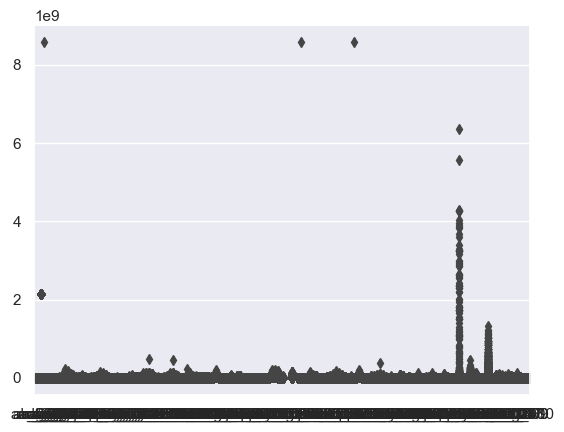

In [60]:
sns.boxplot(data=aps_failure_df)

Looking at diagram ca_000 to da_000

In [61]:
sns.pairplot(aps_failure_df, x_vars=['ca_000','cb_000','cc_000','cd_000','ce_000','cf_000','cg_000','ch_000','ci_000','cj_000','ck_000','cl_000','cm_000','cn_000','cn_001','cn_002','cn_003','cn_004','cn_005','cn_006','cn_007','cn_008','cn_009','co_000','cp_000','cq_000','cr_000','cs_000','cs_001','cs_002','cs_003','cs_004','cs_005','cs_006','cs_007','cs_008','cs_009','ct_000','cu_000','cv_000','cx_000','cy_000','cz_000',], 
             y_vars=['da_000', 'db_000', 'dc_000', 'dd_000', 'de_000', 'df_000', 'dg_000', 'dh_000', 'di_000', 'dj_000', 'dk_000', 'dl_000', 'dm_000', 'dn_000', 'do_000', 'dp_000', 'dq_000', 'dr_000', 'ds_000', 'dt_000', 'du_000', 'dv_000', 'dx_000', 'dy_000', 'dz_000'],
             hue='class')


KeyboardInterrupt



Error in callback <function flush_figures at 0x0000017A2A656A20> (for post_execute):



KeyboardInterrupt



Looking at diagram ee_000 to aa_000

In [ ]:
sns.pairplot(aps_failure_df, x_vars=['ea_000','eb_000','ec_00','ed_000','ee_000','ee_001','ee_002','ee_003','ee_004','ee_005','ee_006','ee_007','ee_008','ee_009','ef_000','eg_000'], 
             y_vars=['aa_000','ab_000','ac_000','ad_000','ae_000','af_000','ag_000','ag_001','ag_002','ag_003','ag_004','ag_005','ag_006','ag_007','ag_008','ag_009','ah_000','ai_000','aj_000','ak_000','al_000','am_0','an_000','ao_000','ap_000','aq_000','ar_000','as_000','at_000','au_000','av_000','ax_000','ay_000','ay_001','ay_002','ay_003','ay_004','ay_005','ay_006','ay_007','ay_008','ay_009','az_000','az_001','az_002','az_003','az_004','az_005','az_006','az_007','az_008','az_009',],
             hue='class')

# Scatter Chart for Random Range 

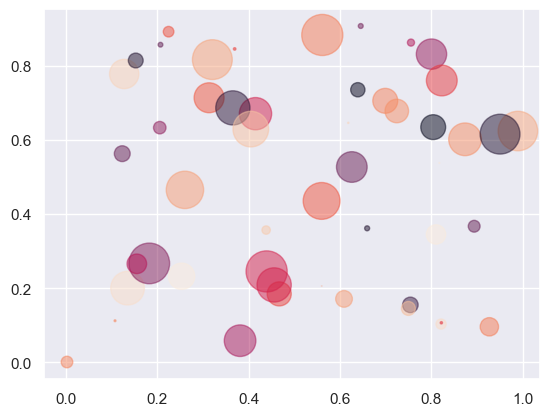

In [27]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [28]:
class_count = aps_failure_df["class"].value_counts()
print(class_count)

neg    59000
pos     1000
Name: class, dtype: int64


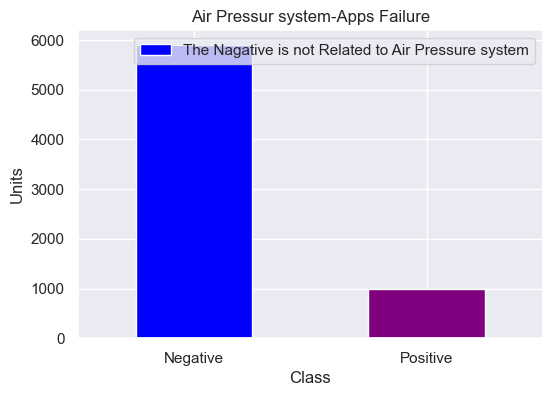

In [29]:
class_counts = pd.Series([5900, 1000], index=['Negative', 'Positive'])
plt.figure(figsize=(6, 4))
class_counts.plot(kind= 'bar', color=['Blue', 'purple'])
plt.xlabel('Class')
plt.ylabel('Units')
plt.title('Air Pressur system-Apps Failure')
plt.xticks(range(len(class_count.index)), ['Negative', 'Positive'], rotation=0)
plt.legend(['The Nagative is not Related to Air Pressure system'])
plt.show()

In this sections i will be covering "what data are we exploring in this assignment, I will be looking

We are going to look at a data set on cars called “cardata.csv”.

The data contains more than 6,000 rows and more than 171 columns which have features

Assessing a Specific col

Looking at Numerical data:

# Step 4: Principal Component Analysis

 Principal Component Analysis, In this section, i will be explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering,

# Number of Features Needed for Retain 99.5% Variance

In [30]:
from sklearn.preprocessing import LabelEncoder
L_encoder = LabelEncoder()
aps_failure_df["class"]=L_encoder.fit_transform(aps_failure_df["class"])
aps_failure_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


The code above am using scikit-learn library to encove categorical lables into nume3rical vales as this is my goal in specififcally, coverting the class column in the aps_failure_df. The main purpose is tp prepare the target veriables for machine learning algorithms. The labelEncoder will assigne a unique number to each unique class column making it easier ML model.

In [31]:
from sklearn.decomposition import PCA

(0.0, 10.0)

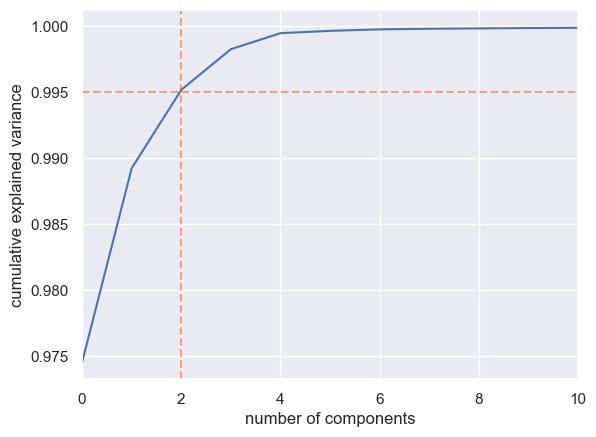

In [32]:
aps_failure_df_no_label = aps_failure_df.drop(aps_failure_df["class"])
pca = PCA().fit(aps_failure_df_no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(0.9950,color= "orangered",alpha=.5,ls="--")
plt.axvline(2,color= "orangered",alpha=.5,ls="--");
plt.xlim(0,10)

The main aim is to retain 99.5% variance data from the graphic show above, my understanding is that i must keep my features no higher or below 2 in order to get the results i am looking for.

The Graph above clearly show's that i would need it to be 2 Components to achive my objective of hitting a 99.5%

Analysing the implement PCA to dimensionally reduce the data to the number of features that you have discovered

In [33]:
pca = PCA(2)
projected = pca.fit_transform(aps_failure_df_no_label)

In [34]:
projected.shape

(59998, 2)

Side notes: observatins (Rows) equalling to 59998 and having 10 columns (Attributes)

# Identfying Array's within the dataset

In [35]:
projected

array([[-3.36167739e+08, -5.62731005e+06],
       [-3.36144772e+08, -6.27149676e+06],
       [-3.36220682e+08, -4.90490381e+06],
       ...,
       [ 1.79453817e+09, -1.43237921e+06],
       [ 1.79447010e+09,  9.85382274e+05],
       [-3.36251687e+08, -4.90364855e+06]])

The Array's format clearly displays that each of my obsersavtion has number of values of 2, although not the orginal values were present in the orginal dataset.

in order to understand the dataframe better and have a clear picture i have clearly displayed below: for the purpose of demonstrations, I have labled the colums all 10 of them below for visual purpose. 

# Identfying PCA Ptojected Columns

In [36]:
failure_pca = pd.DataFrame(projected, columns =['C1','C2',])

In [37]:
failure_pca.head()

,C1,C2
0,-3.361677e+08,-5.627310e+06
1,-3.361448e+08,-6.271497e+06
2,-3.362207e+08,-4.904904e+06
3,1.794542e+09,-6.490103e+05
4,-3.361447e+08,-6.254154e+06


As you can see that all my columns are labled with C1 to C10. 

In [38]:
failure_pca["class"] = aps_failure_df["class"]

In [39]:
failure_pca.head()

,C1,C2,class
0,-3.361677e+08,-5.627310e+06,0
1,-3.361448e+08,-6.271497e+06,0
2,-3.362207e+08,-4.904904e+06,0
3,1.794542e+09,-6.490103e+05,0
4,-3.361447e+08,-6.254154e+06,0


Data set I want to work with

As you can see that I will be selecting only the Frist Colum from C1 to C2. just before it get to the last column class. 

PCA was used to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. 

This will Include a clear and concise explanation of what you i will be doing with the data 

and why you are doing it.

# Step 5:Curse of Dimensionality

introduction to Dimensionality, how has this played in my analysis! 

# Conclusion

# Reference

Pratusevich, M. (2017a). Practice Python. [online] Practicepython.org. Available at: https://www.practicepython.org/.

Vishal (2019). Python Basic Exercise for Beginners. [online] PYnative. Available at: https://pynative.com/python-basic-exercise-for-beginners/.

John Paul Mueller and Luca Massaron (2023). Python for Data Science For Dummies. John Wiley & Sons.

Idris, I. (2011). NumPy 1.5 : beginner’s guide. Birmingham: Packt Publishing.
